## -0. Setting

In [1]:
import os
import statsmodels.api as sm     # install statsmodels if not installed
import statsmodels.formula.api as smf
import random
from tqdm import tqdm
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

random.seed(76019367)
mpl.rcParams['agg.path.chunksize'] = 10000

import statsmodels.api as sm     # install statsmodels if not installed
import statsmodels.formula.api as smf

## -1. Data preparing

In [2]:
file_list = os.listdir('D:/Working_Place/new_uber/data/data_processed')
file_list.remove('.ipynb_checkpoints')
file_list

['y1901.csv',
 'y1902.csv',
 'y1903.csv',
 'y1904.csv',
 'y1905.csv',
 'y1906.csv',
 'y1907.csv',
 'y1908.csv',
 'y1909.csv',
 'y1910.csv',
 'y1911.csv',
 'y1912.csv',
 'y2001.csv',
 'y2002.csv',
 'y2003.csv',
 'y2004.csv',
 'y2005.csv',
 'y2006.csv',
 'y2007.csv',
 'y2008.csv',
 'y2009.csv',
 'y2010.csv',
 'y2011.csv',
 'y2012.csv',
 'y2101.csv',
 'y2102.csv',
 'y2103.csv',
 'y2104.csv',
 'y2105.csv',
 'y2106.csv',
 'y2107.csv',
 'y2108.csv',
 'y2109.csv',
 'y2110.csv',
 'y2111.csv',
 'y2112.csv',
 'y2201.csv',
 'y2202.csv',
 'y2203.csv',
 'y2204.csv',
 'y2205.csv',
 'y2206.csv',
 'y2207.csv',
 'y2208.csv',
 'y2209.csv',
 'y2210.csv',
 'y2211.csv',
 'y2212.csv']

In [3]:
data_samples = []
for file in tqdm(file_list):
    each_data = pd.read_csv('D:/Working_Place/new_uber/data/data_processed/'+file,index_col=0)
    each_data_sampled = each_data.sample(frac=0.01)
    data_samples.append(each_data_sampled)
    del each_data
    del each_data_sampled

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [05:58<00:00,  7.47s/it]


In [4]:
data_sample = pd.concat(data_samples)
data_sample.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,average_speed
4150206,2,2019-01-18 02:49:39,2019-01-18 02:51:35,5.0,0.53,1.0,N,114,90,1,3.5,0.5,0.5,0.96,0.0,0.3,5.76,0.0,0.0,16.448276
579173,2,2019-01-03 20:20:09,2019-01-03 20:24:21,5.0,0.74,1.0,N,79,137,1,5.0,0.5,0.5,0.63,0.0,0.3,6.93,0.0,0.0,10.571429
6799570,1,2019-01-28 19:22:00,2019-01-28 19:49:53,1.0,6.90,1.0,N,230,66,1,24.0,1.0,0.5,5.15,0.0,0.3,30.95,0.0,0.0,14.847579
1074781,1,2019-01-05 23:51:57,2019-01-05 23:55:11,1.0,0.40,1.0,N,163,161,1,4.0,0.5,0.5,1.05,0.0,0.3,6.35,0.0,0.0,7.422680
5515413,2,2019-01-23 21:06:24,2019-01-23 21:12:01,1.0,1.86,1.0,N,229,236,1,7.0,0.5,0.5,1.00,0.0,0.3,9.30,0.0,0.0,19.869436


In [5]:
len(data_sample),data_sample.columns

(1592429,
 Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
        'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
        'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
        'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
        'total_amount', 'congestion_surcharge', 'airport_fee', 'average_speed'],
       dtype='object'))

## -2. Tipping behavior according to various factors

In [6]:
data_sample['tpep_pickup_datetime']=data_sample['tpep_pickup_datetime'].apply(lambda x:dt.strptime(x,'%Y-%m-%d %H:%M:%S'))
data_sample['tpep_dropoff_datetime']=data_sample['tpep_dropoff_datetime'].apply(lambda x:dt.strptime(x,'%Y-%m-%d %H:%M:%S'))

<AxesSubplot:xlabel='tpep_pickup_datetime'>

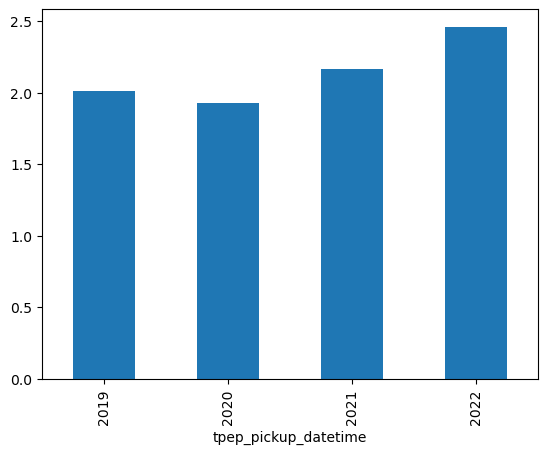

In [59]:
data_sample.groupby(data_sample.tpep_pickup_datetime.dt.year).agg({'tip_amount':['count','mean','var','min','max']})[('tip_amount','mean')].plot(kind='bar')

<AxesSubplot:xlabel='tpep_pickup_datetime'>

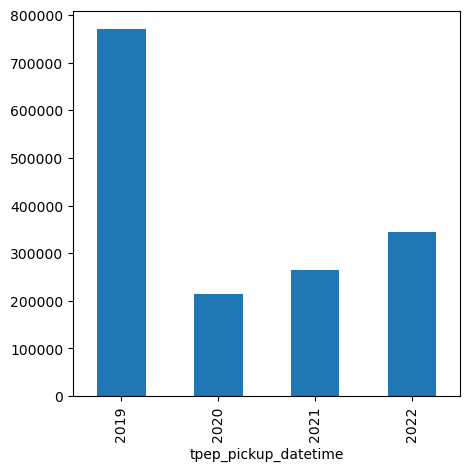

In [38]:
data_sample.groupby(data_sample.tpep_pickup_datetime.dt.year).agg({'tip_amount':['count','mean','var','min','max']})[('tip_amount','count')].plot(kind='bar')

<AxesSubplot:xlabel='tpep_pickup_datetime'>

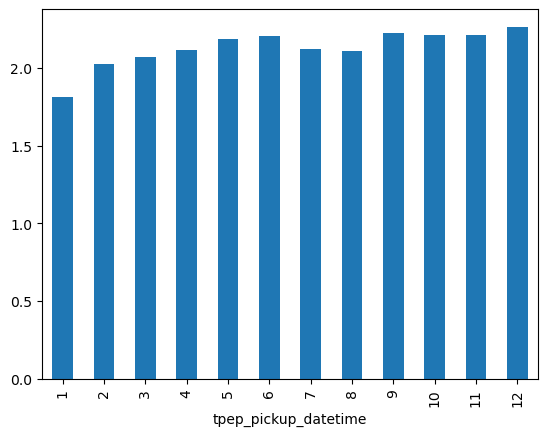

In [50]:
data_sample.groupby(data_sample.tpep_pickup_datetime.dt.month).agg({'tip_amount':['count','mean','var','min','max']})[('tip_amount','mean')].plot(kind='bar')

<AxesSubplot:xlabel='tpep_pickup_datetime'>

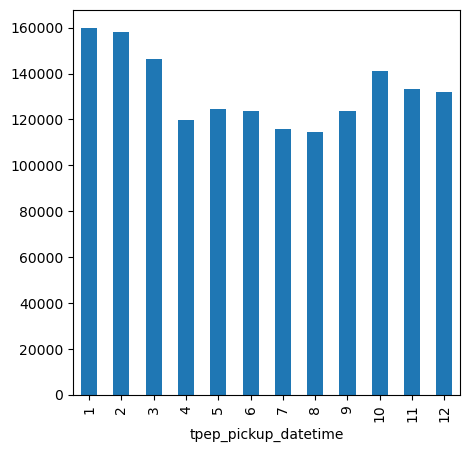

In [39]:
data_sample.groupby(data_sample.tpep_pickup_datetime.dt.month).agg({'tip_amount':['count','mean','var','min','max']})[('tip_amount','count')].plot(kind='bar')

<AxesSubplot:xlabel='tpep_pickup_datetime'>

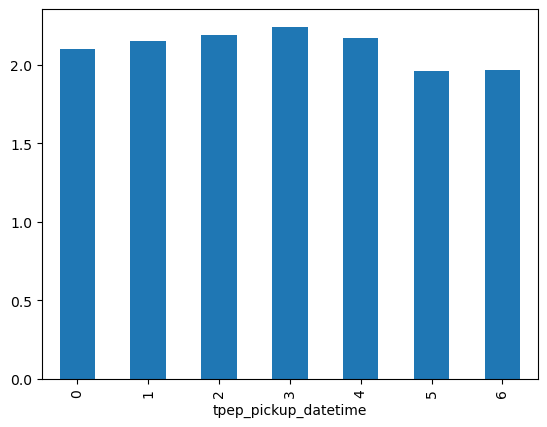

In [52]:
data_sample.groupby(data_sample.tpep_pickup_datetime.dt.weekday).agg({'tip_amount':['count','mean','var','min','max']})[('tip_amount','mean')].plot(kind='bar')

<AxesSubplot:xlabel='tpep_pickup_datetime'>

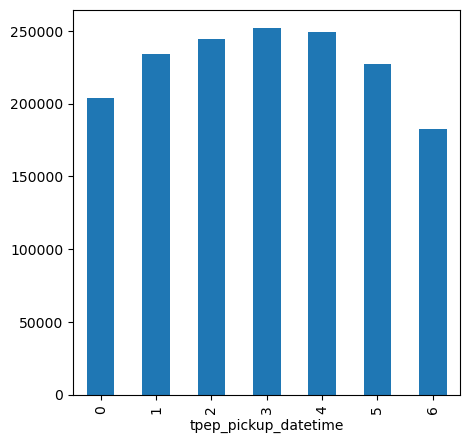

In [40]:
data_sample.groupby(data_sample.tpep_pickup_datetime.dt.weekday).agg({'tip_amount':['count','mean','var','min','max']})[('tip_amount','count')].plot(kind='bar')

<AxesSubplot:xlabel='tpep_pickup_datetime'>

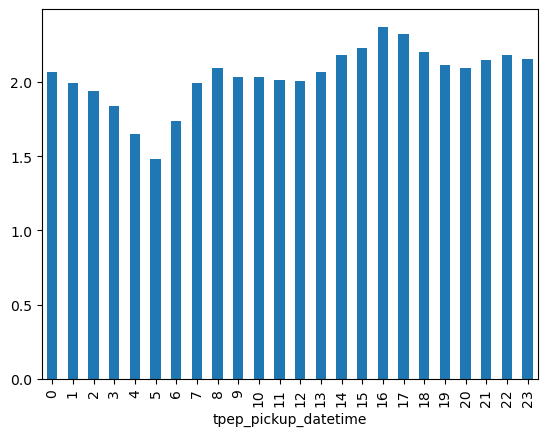

In [55]:
data_sample.groupby(data_sample.tpep_pickup_datetime.dt.hour).agg({'tip_amount':['count','mean','var','min','max']})[('tip_amount','mean')].plot(kind='bar')

<AxesSubplot:xlabel='tpep_pickup_datetime'>

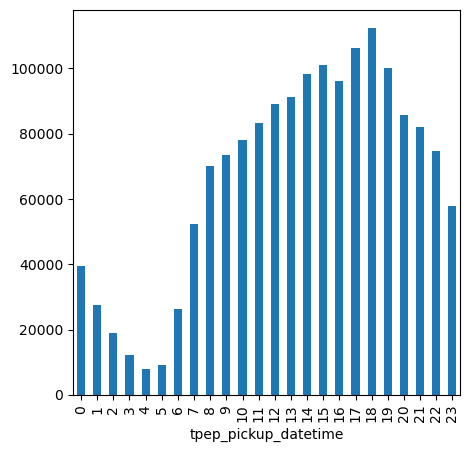

In [41]:
data_sample.groupby(data_sample.tpep_pickup_datetime.dt.hour).agg({'tip_amount':['count','mean','var','min','max']})[('tip_amount','count')].plot(kind='bar')

<AxesSubplot:xlabel='passenger_count'>

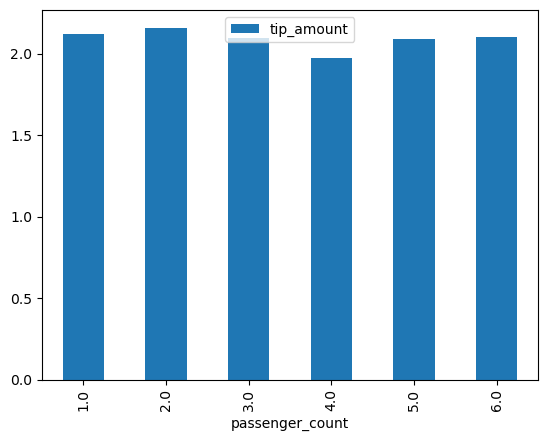

In [68]:
data_sample.groupby('passenger_count').agg({'tip_amount':'mean'}).plot(kind='bar')

<AxesSubplot:xlabel='passenger_count'>

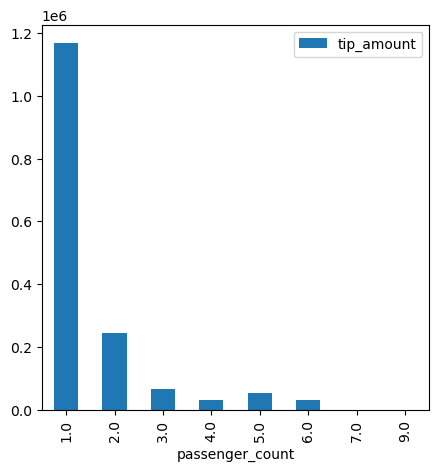

In [44]:
data_sample.groupby('passenger_count').agg({'tip_amount':'count'}).plot(kind='bar')

<AxesSubplot:xlabel='airport_fee'>

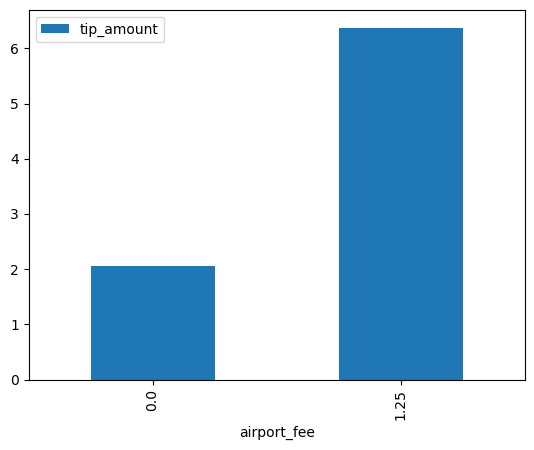

In [75]:
data_sample.groupby('airport_fee').agg({'tip_amount':'mean'}).plot(kind='bar')

<AxesSubplot:xlabel='congestion_surcharge'>

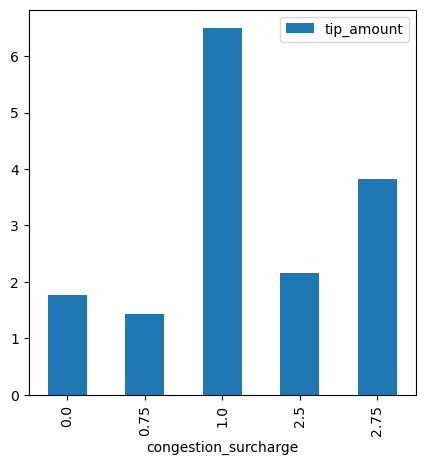

In [45]:
data_sample.groupby('congestion_surcharge').agg({'tip_amount':'mean'}).plot(kind='bar')

<AxesSubplot:xlabel='tpep_pickup_datetime,tpep_pickup_datetime,tpep_pickup_datetime'>

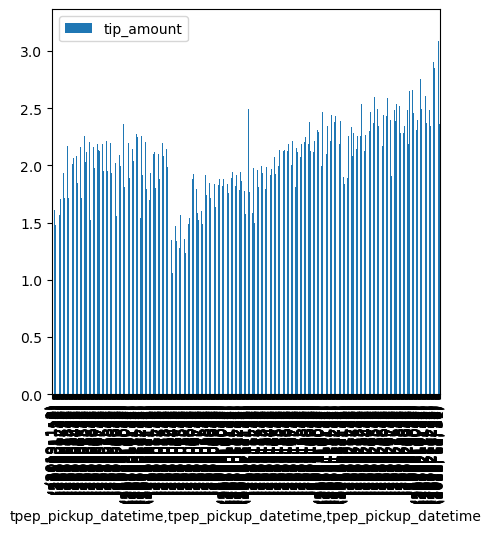

In [47]:
data_sample.groupby([data_sample.tpep_pickup_datetime.dt.year,data_sample.tpep_pickup_datetime.dt.month,data_sample.tpep_pickup_datetime.dt.day]).agg({'tip_amount':'mean'}).plot(kind='bar')

## -3. Let's do some regression!

### 1) Dummy variables

In [7]:
data_sample.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'average_speed'],
      dtype='object')

<AxesSubplot:>

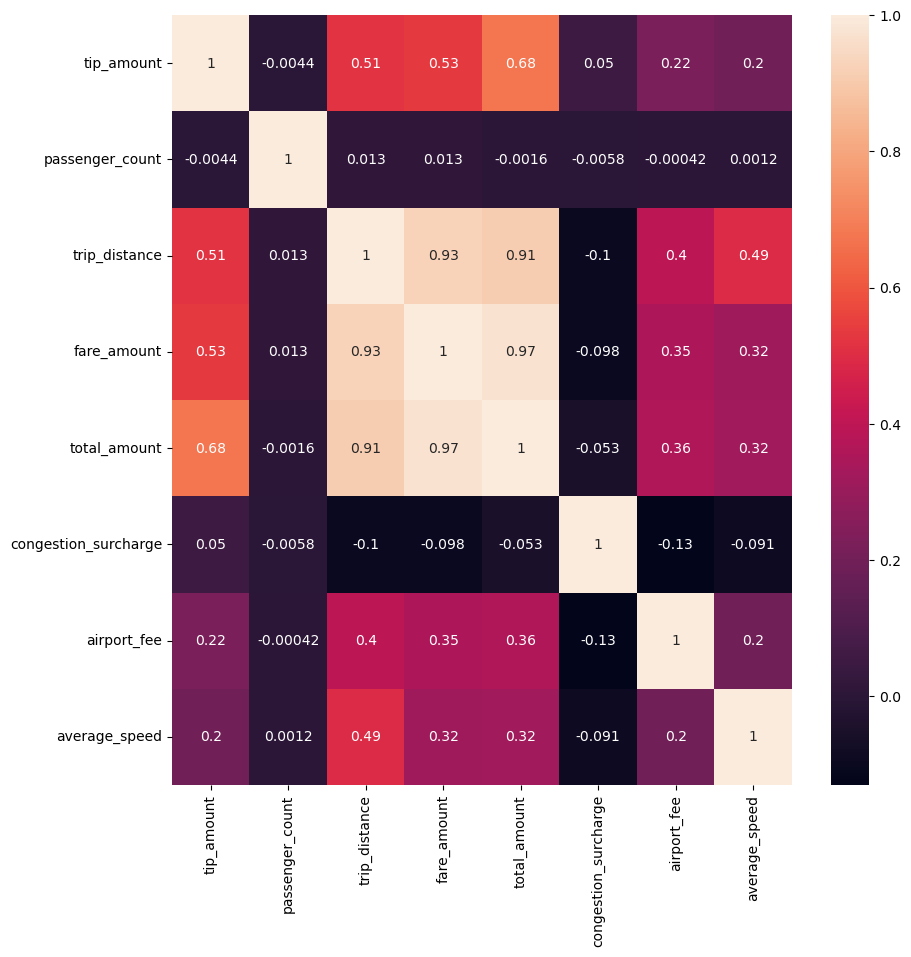

In [9]:
corr_dt=data_sample[['tip_amount','passenger_count','trip_distance','fare_amount','total_amount','congestion_surcharge','airport_fee','average_speed']].corr()
plt.rcParams['figure.figsize']=(10,10)
sns.heatmap(corr_dt, annot=True)

In [16]:
start_location_dummies = pd.get_dummies(data_sample['PULocationID'],prefix='PULocation')
start_location_dummies.head()

,PULocation_1,PULocation_3,PULocation_4,PULocation_5,PULocation_6,PULocation_7,PULocation_8,PULocation_9,PULocation_10,PULocation_11,...,PULocation_256,PULocation_257,PULocation_258,PULocation_259,PULocation_260,PULocation_261,PULocation_262,PULocation_263,PULocation_264,PULocation_265
4150206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
579173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6799570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1074781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5515413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
end_location_dummies = pd.get_dummies(data_sample['DOLocationID'],prefix='DOLocation')
end_location_dummies.head()

,DOLocation_1,DOLocation_2,DOLocation_3,DOLocation_4,DOLocation_5,DOLocation_6,DOLocation_7,DOLocation_8,DOLocation_9,DOLocation_10,...,DOLocation_256,DOLocation_257,DOLocation_258,DOLocation_259,DOLocation_260,DOLocation_261,DOLocation_262,DOLocation_263,DOLocation_264,DOLocation_265
4150206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
579173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6799570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1074781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5515413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data_sample_with_location_dummies = pd.concat([data_sample,start_location_dummies,end_location_dummies],axis=1)
data_sample_with_location_dummies.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,DOLocation_256,DOLocation_257,DOLocation_258,DOLocation_259,DOLocation_260,DOLocation_261,DOLocation_262,DOLocation_263,DOLocation_264,DOLocation_265
4150206,2,2019-01-18 02:49:39,2019-01-18 02:51:35,5.0,0.53,1.0,N,114,90,1,...,0,0,0,0,0,0,0,0,0,0
579173,2,2019-01-03 20:20:09,2019-01-03 20:24:21,5.0,0.74,1.0,N,79,137,1,...,0,0,0,0,0,0,0,0,0,0
6799570,1,2019-01-28 19:22:00,2019-01-28 19:49:53,1.0,6.90,1.0,N,230,66,1,...,0,0,0,0,0,0,0,0,0,0
1074781,1,2019-01-05 23:51:57,2019-01-05 23:55:11,1.0,0.40,1.0,N,163,161,1,...,0,0,0,0,0,0,0,0,0,0
5515413,2,2019-01-23 21:06:24,2019-01-23 21:12:01,1.0,1.86,1.0,N,229,236,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
time_dummies=[]
time_dummies.append(pd.get_dummies(data_sample.tpep_pickup_datetime.dt.year,prefix='year'))
time_dummies.append(pd.get_dummies(data_sample.tpep_pickup_datetime.dt.month,prefix='month'))
time_dummies.append(pd.get_dummies(data_sample.tpep_pickup_datetime.dt.day,prefix='day'))
time_dummies.append(pd.get_dummies(data_sample.tpep_pickup_datetime.dt.hour,prefix='hour'))
time_dummies.append(pd.get_dummies(data_sample.tpep_pickup_datetime.dt.weekday,prefix='weekday'))
data_sample_with_location_time_dummies = pd.concat([data_sample_with_location_dummies]+time_dummies,axis=1)
data_sample_with_location_time_dummies

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,hour_21,hour_22,hour_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
4150206,2,2019-01-18 02:49:39,2019-01-18 02:51:35,5.0,0.53,1.0,N,114,90,1,...,0,0,0,0,0,0,0,1,0,0
579173,2,2019-01-03 20:20:09,2019-01-03 20:24:21,5.0,0.74,1.0,N,79,137,1,...,0,0,0,0,0,0,1,0,0,0
6799570,1,2019-01-28 19:22:00,2019-01-28 19:49:53,1.0,6.90,1.0,N,230,66,1,...,0,0,0,1,0,0,0,0,0,0
1074781,1,2019-01-05 23:51:57,2019-01-05 23:55:11,1.0,0.40,1.0,N,163,161,1,...,0,0,1,0,0,0,0,0,1,0
5515413,2,2019-01-23 21:06:24,2019-01-23 21:12:01,1.0,1.86,1.0,N,229,236,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001095,2,2022-12-28 22:16:31,2022-12-28 22:23:54,1.0,1.42,1.0,N,263,229,2,...,0,1,0,0,0,1,0,0,0,0
2967890,2,2022-12-28 15:52:36,2022-12-28 16:23:53,1.0,3.54,1.0,N,162,158,1,...,0,0,0,0,0,1,0,0,0,0
2904060,1,2022-12-27 19:38:11,2022-12-27 19:55:46,1.0,2.70,1.0,N,142,238,1,...,0,0,0,0,1,0,0,0,0,0
2030054,2,2022-12-17 23:32:39,2022-12-18 00:08:40,1.0,4.53,1.0,N,141,148,1,...,0,0,1,0,0,0,0,0,1,0


In [28]:
data_sample_with_location_time_dummies['PULocationID'] = data_sample_with_location_time_dummies.PULocationID.astype("category")
data_sample_with_location_time_dummies['DOLocationID'] = data_sample_with_location_time_dummies.DOLocationID.astype("category")


### 2) Regression

In [25]:
zeroth_regression = smf.ols("tip_amount ~ passenger_count + trip_distance", 
                           data=data_sample_with_location_time_dummies).fit()
print(zeroth_regression.summary())

                            OLS Regression Results                            
Dep. Variable:             tip_amount   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                 2.872e+05
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:42:52   Log-Likelihood:            -3.3555e+06
No. Observations:             1592429   AIC:                         6.711e+06
Df Residuals:                 1592426   BIC:                         6.711e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1093      0.003    3

In [30]:
first_regression = smf.ols("tip_amount ~ passenger_count + trip_distance + C(tpep_pickup_datetime.dt.month)", 
                           data=data_sample_with_location_time_dummies).fit()
print(first_regression.summary())

                            OLS Regression Results                            
Dep. Variable:             tip_amount   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                 4.449e+04
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:53:36   Log-Likelihood:            -3.3540e+06
No. Observations:             1592429   AIC:                         6.708e+06
Df Residuals:                 1592415   BIC:                         6.708e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [33]:
second_regression = smf.ols("tip_amount ~ passenger_count + trip_distance +\
                            C(tpep_pickup_datetime.dt.year)+\
                            C(tpep_pickup_datetime.dt.month)+\
                            C(tpep_pickup_datetime.dt.day)+\
                            C(tpep_pickup_datetime.dt.hour)+\
                            C(tpep_pickup_datetime.dt.weekday)+\
                            C(PULocationID)+\
                            C(DOLocationID)", 
                           data=data_sample_with_location_time_dummies).fit()
print(second_regression.summary())

                            OLS Regression Results                            
Dep. Variable:             tip_amount   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     1243.
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:58:36   Log-Likelihood:            -3.3025e+06
No. Observations:             1592429   AIC:                         6.606e+06
Df Residuals:                 1591846   BIC:                         6.613e+06
Df Model:                         582                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [34]:
third_regression = smf.ols("tip_amount ~ passenger_count + trip_distance +\
                            C(tpep_pickup_datetime.dt.year)+\
                            C(tpep_pickup_datetime.dt.month)+\
                            C(tpep_pickup_datetime.dt.day)+\
                            C(tpep_pickup_datetime.dt.hour)+\
                            C(tpep_pickup_datetime.dt.weekday)+\
                            C(PULocationID)+\
                            C(DOLocationID)+\
                            C(congestion_surcharge)+\
                            C(airport_fee)", 
                           data=data_sample_with_location_time_dummies).fit()
print(third_regression.summary())

                            OLS Regression Results                            
Dep. Variable:             tip_amount   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     1247.
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:19:32   Log-Likelihood:            -3.2994e+06
No. Observations:             1592429   AIC:                         6.600e+06
Df Residuals:                 1591841   BIC:                         6.607e+06
Df Model:                         587                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------